# Imports

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# from matplotlib import colors as mcolors
from pathlib import Path

import os
import sys
sys.path.append('../')  # Add parent directory to the Python path

import package_DBR
import package_LAB

from importlib import reload
package_DBR = reload (package_DBR)
package_LAB = reload(package_LAB)

from package_LAB import *
from package_DBR import *

# Load Data

In [2]:
nameFile = "Cleaned_data_Open_loop_experiment_on_MV_2024-04-02-12h34.txt"
# nameFile = "Cleaned_data_Open_loop_experiment_on_DV_2024-03-27-17h23"
# titleName = nameFile.split('.')[0]

dataFilePath = "../Data/" + nameFile
print(os.path.abspath('../Data/'))
print(os.path.abspath(dataFilePath))

data = pd.read_csv(dataFilePath)


if "MV" in nameFile :
    ExpVariable = "MV"
    tm = data['tm'].values# - data['t'].values[0]
    MVm = data['MVm'].values
    PVm = data['PVm'].values

else:
    ExpVariable = "DV"
    tm = data['tm'].values
    DVm = data['DVm'].values
    PVm = data['PVm'].values

print(ExpVariable)


c:\Users\vassi\OneDrive\Bureau\Cours\BA3\Q2\Control_Theory\Laboratory\Control_theory_software_V3\Data
c:\Users\vassi\OneDrive\Bureau\Cours\BA3\Q2\Control_Theory\Laboratory\Control_theory_software_V3\Data\Cleaned_data_Open_loop_experiment_on_MV_2024-04-02-12h34.txt
MV


# Approximations Methods

### Parameters (obtained via Tangent at Inflexion Method)

In [3]:
# Méthode de la Tangente au point d'inflexion
Kp = 0.36             # Process gain (affect MV and PV)
T1 = 65 #72 #83
T2 = 88 #99 #110 
a = 0.1
T_g = 201 # 220 #188
T_u = 8 #10 #17

print('VDG_Ratio = ', T_u/T_g)


Ts = 1  # Value Imposed
TSim = len(MVm)


VDG_Ratio =  0.03980099502487562


### FOPDT (Simple Broida Method)

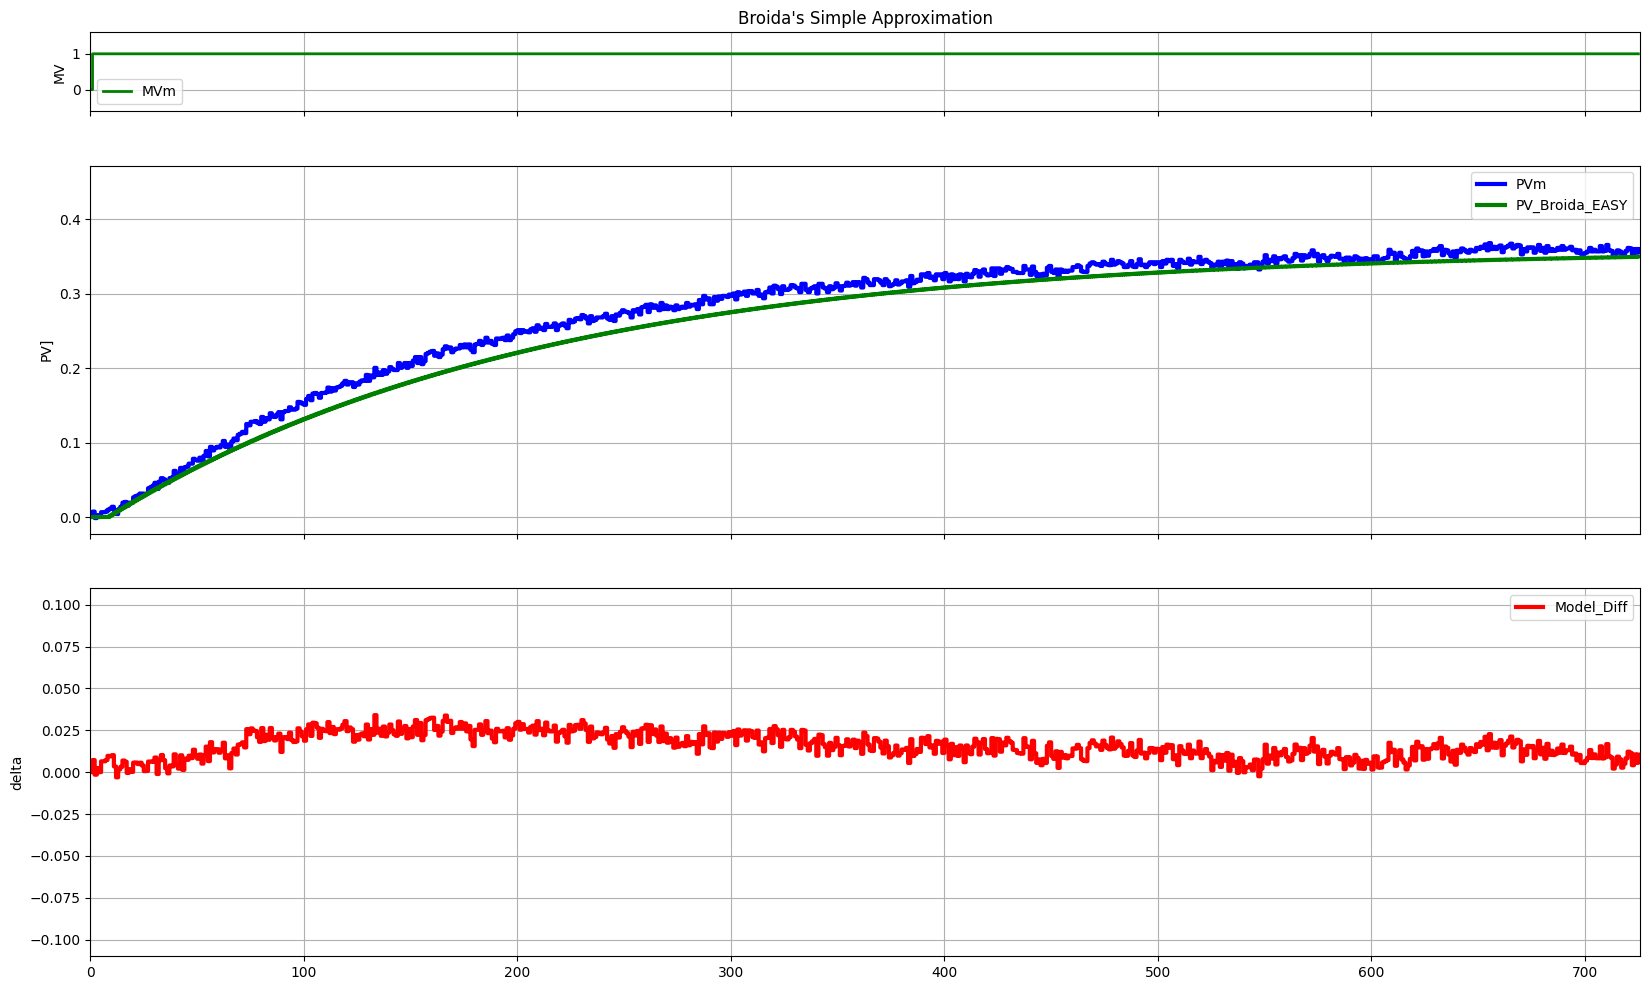

In [4]:
# T = T_g and theta = T_u
Kp_Broida_EASY = Kp
T_Broida_EASY = T_g
theta_Broida_EASY = T_u

#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Broida_EASY = FOPDT(MV=MVm, Kp=Kp_Broida_EASY, T=T_Broida_EASY, theta=theta_Broida_EASY, Ts=Ts, PVInit=0, method='EBD')


#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Broida's Simple Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 0.45
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Broida_EASY', where='post') 
ax2.set_ylabel('PV]')
ax2.legend (loc='best')

#---Model_Diff
limSup = 0.1
limInf = -0.1
diff_BroidaEASY_PV = [a - b for a,b in zip(PVm, PV_Broida_EASY)]
l4, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Broida_EASY)

l4.set_data(tm,diff_BroidaEASY_PV)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()







### FOPDT (Broida's Harder Method)

T_Broida_HARD =  126.5
theta_Broida_HARD =  23.599999999999994


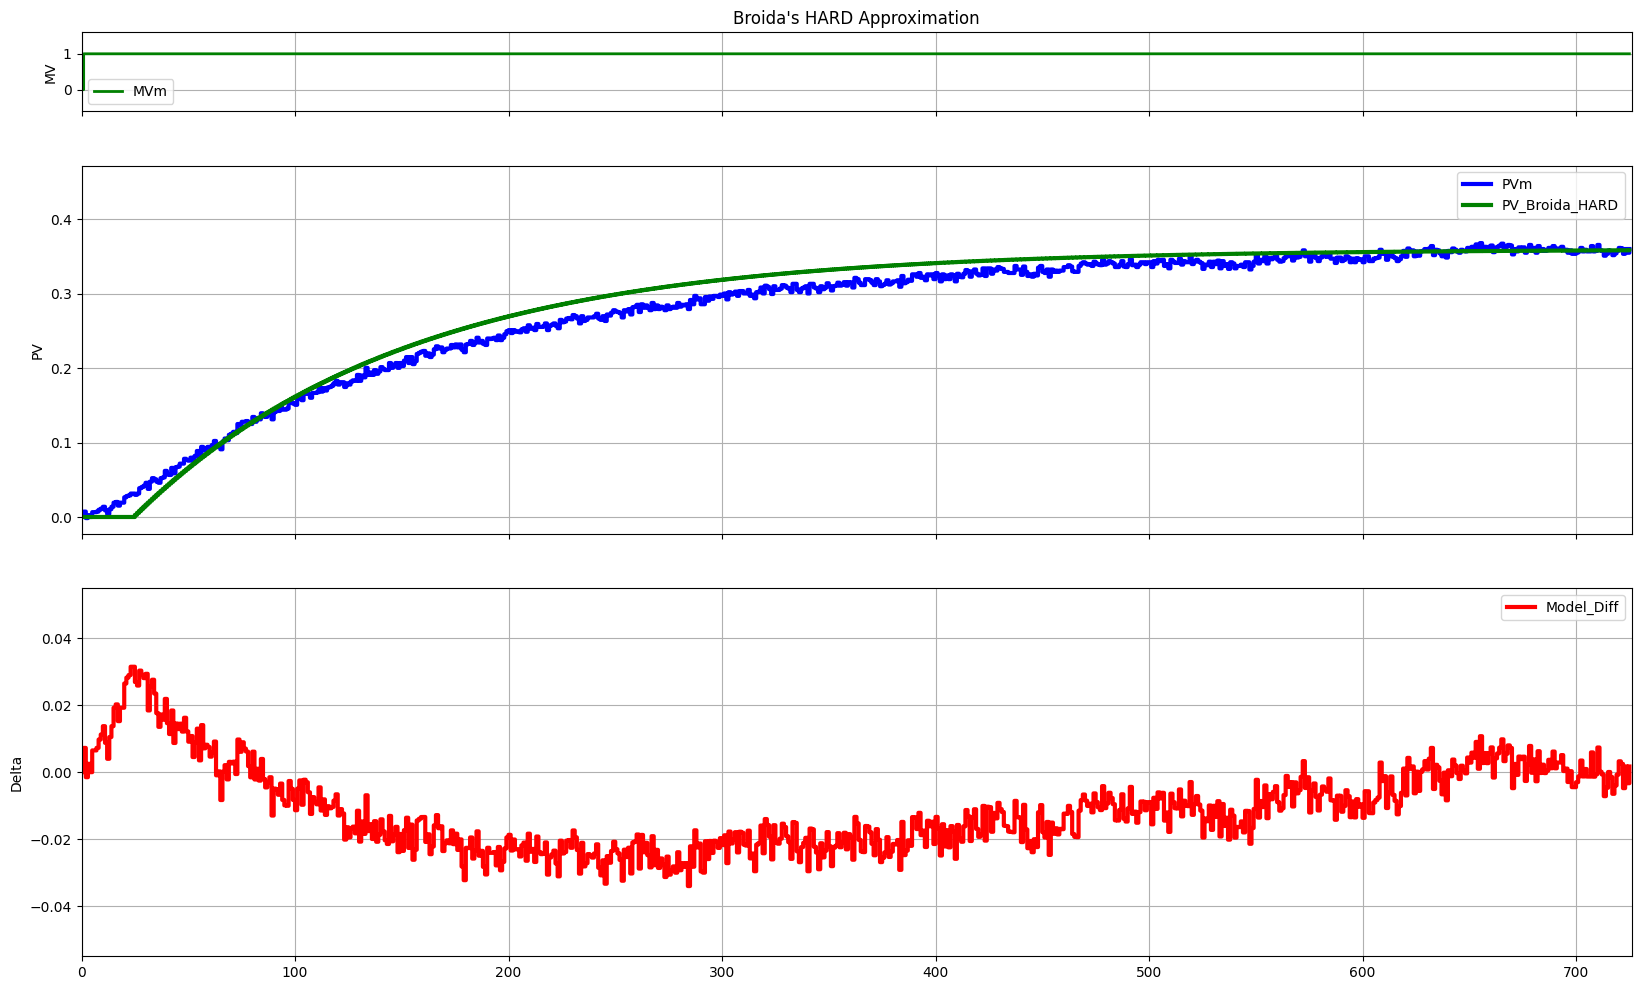

In [5]:
# T = T_g and theta = T_u
Kp_Broida_HARD = Kp
T_Broida_HARD = 5.5 * (T2 - T1)
theta_Broida_HARD = 2.8*T1 - 1.8*T2
print('T_Broida_HARD = ', T_Broida_HARD)
print('theta_Broida_HARD = ', theta_Broida_HARD)

#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Broida_HARD = FOPDT(MV=MVm, Kp=Kp_Broida_HARD, T=T_Broida_HARD, theta=theta_Broida_HARD, Ts=Ts, PVInit=0, method='EBD')


#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Broida's HARD Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 0.45
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Broida_HARD', where='post') 
ax2.set_ylabel('PV')
ax2.legend (loc='best')

#---Model_Diff
limSup = 0.05
limInf = -0.05
diff_BroidaEASY_PV = [a - b for a,b in zip(PVm, PV_Broida_HARD)]
l4, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('Delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Broida_HARD)

l4.set_data(tm,diff_BroidaEASY_PV)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()







### SOPDT (Van Der Grinten)

T1_Grinten =  0.4588342995229003
T2_Grinten =  100.27058285023855
theta_Grinten =  7.8472881679665605


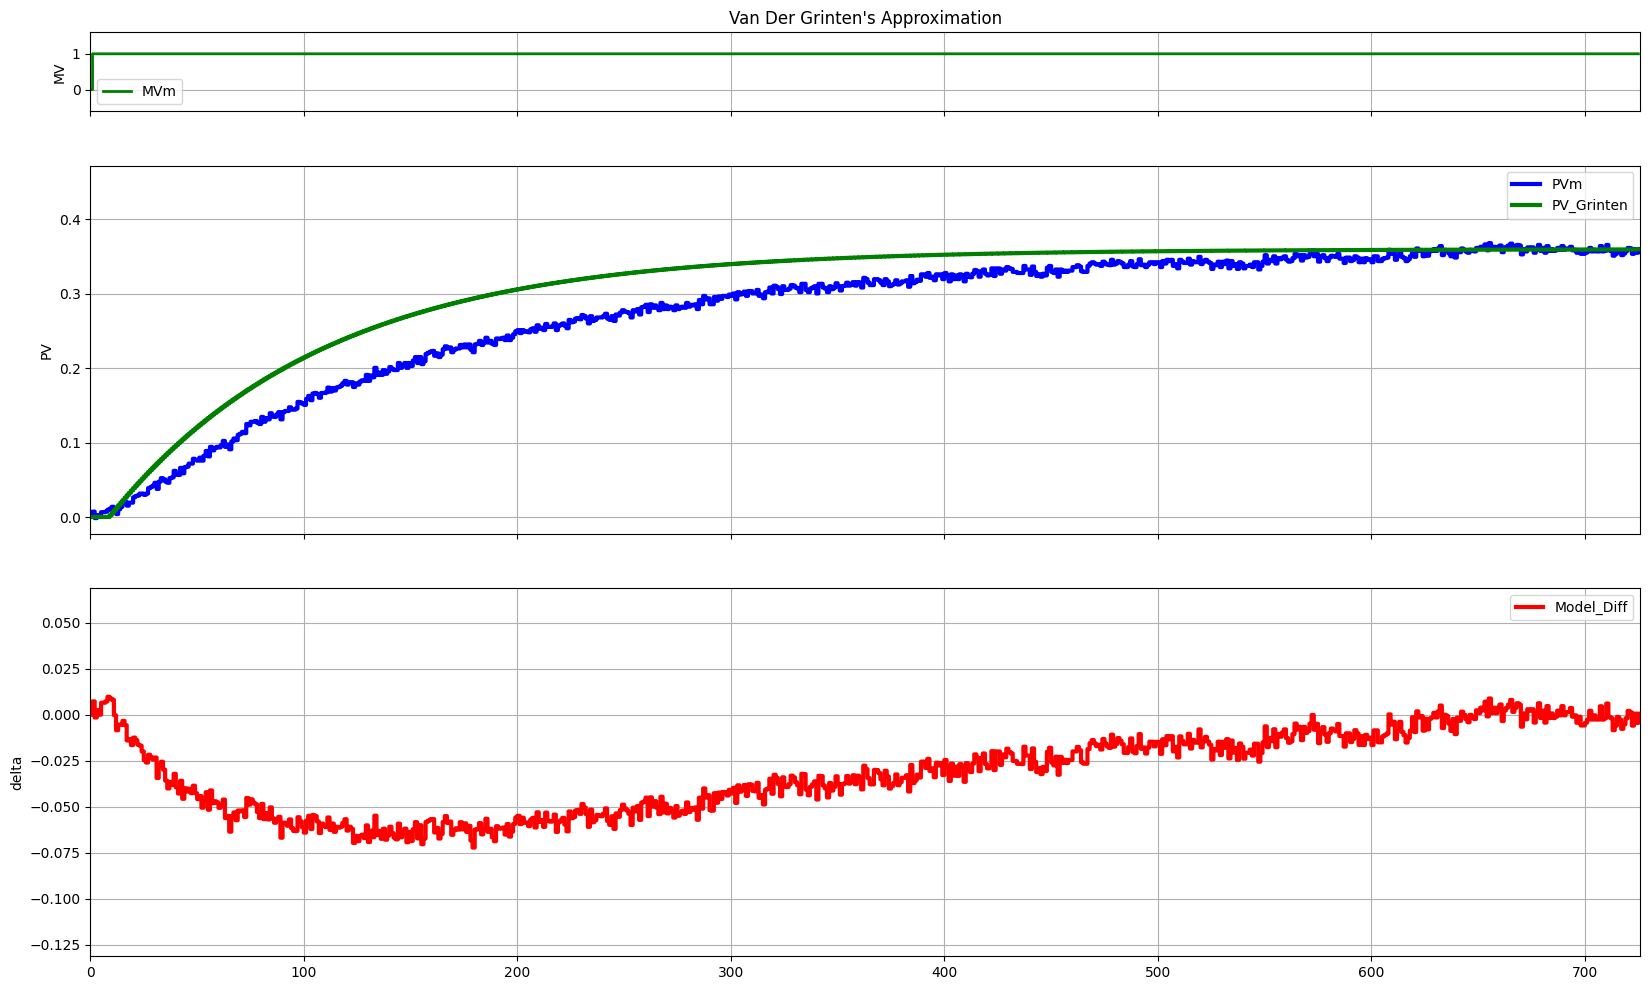

In [6]:
a_vdg = 0.123

# Equivalent Broida + FO
Kp_Grinten =Kp
T1_Grinten = T_g * ((3*a_vdg*np.e -1)/(1+a_vdg*np.e))
T2_Grinten = T_g * ((1-a_vdg*np.e)/(1+a_vdg*np.e))
theta_Grinten = T_u - ((T1_Grinten*T2_Grinten)/(T1_Grinten+3*T2_Grinten))

print('T1_Grinten = ', T1_Grinten)
print('T2_Grinten = ', T2_Grinten)
print('theta_Grinten = ', theta_Grinten)

#            SOPDT(MV,Kp,T1,T2,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Grinten = SOPDT(MVm, Kp_Grinten, T1_Grinten, T2_Grinten, theta_Grinten, Ts)





#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Van Der Grinten's Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 0.45
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Grinten', where='post') 
ax2.set_ylabel('PV')
ax2.legend (loc='best')

#---Model_Diff
diff_PV_Grinten_PV = [a - b for a,b in zip(PVm, PV_Grinten)]
limSup = max(diff_PV_Grinten_PV)+0.05
limInf = min(diff_PV_Grinten_PV)-0.05
l4, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Grinten)

l4.set_data(tm,diff_PV_Grinten_PV)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()

### Strejc

ratio=  0.03980099502487562
ratio=  8
ratio=  201
T_Strejc1 =  201.0
T_uth1 =  0
theta_Strejc1 =  8
T_Strejc2 =  73.8970588235294
theta_Strejc2 =  12.100000000000001
T_Strejc2_theta =  73.8970588235294
theta_Strejc2_theta =  1
PVstrj1 :  [0.0, 0.007249999999999978, -0.0015000000000000568, 0.002499999999999858, 0.0, 0.00649999999999995, 0.00649999999999995, 0.007249999999999978, 0.009750000000000012, 0.00946782178217811, 0.010194466228801026, 0.0034298896633118423, -0.003075951374625287, 0.0016768998698035009, 0.003188400365497607, 0.006958507294381251, 0.006237178050349646, -0.0004756297617806906, 0.0018200416726834867, 0.00012415037727416672, 0.005686654583327254, 0.0057575127289543546, 0.004836683458018968, 0.005674125619117926, 0.004019798264567841, 0.0006236606493967081, 0.0007356722303403021, 0.006355792664843547, 0.006233981810067159, 0.00637019972189852, 0.008764406653968236, -0.001083436943328596, 0.007076629576192851, 0.010244567053538385, 0.0071703365235703115, 0.002353899214

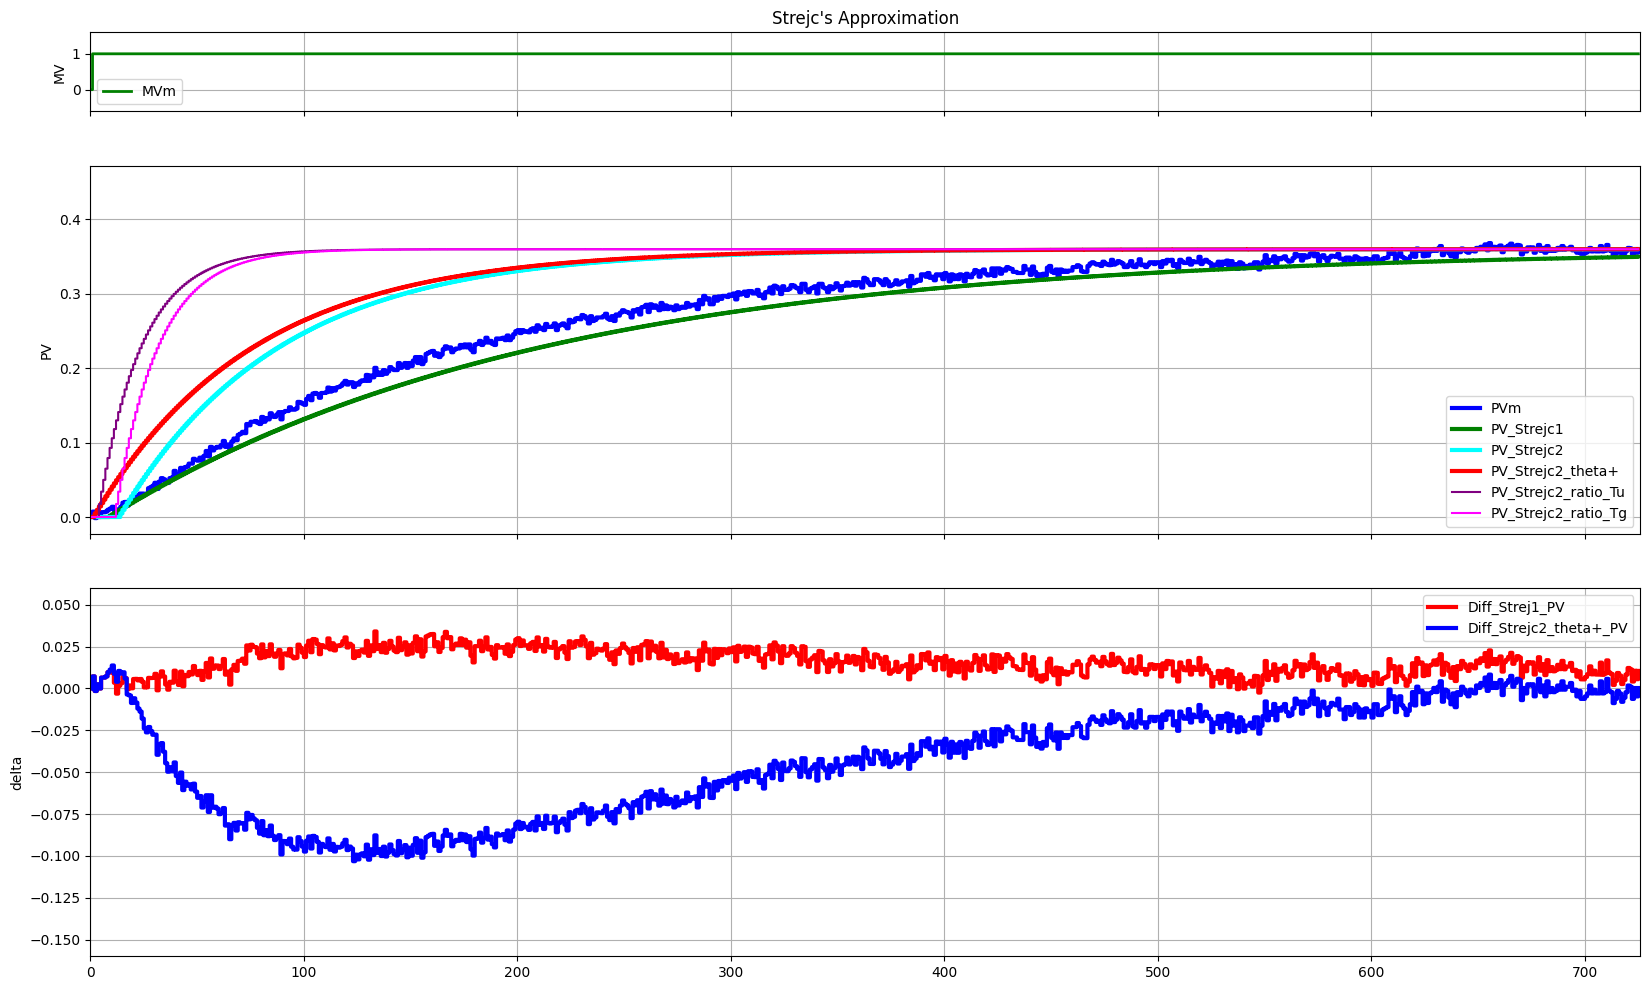

In [7]:
# n-time constants + delay
Kp_Strejc = Kp
a_n = [0, 0.1, 0.22, 0.32, 0.41, 0.49, 0.57]
b_n = [1, 2.72, 3.69, 4.46, 5.12, 5.7, 6.23]

Ratio = T_u/T_g   # 0.090
print("ratio= ", Ratio)
print("ratio= ", T_u)
print("ratio= ", T_g)

#----Plot_All_7_orders
# T_Strejc = []
# T_uth = []       # Apparent dead-time
# theta_Strejc = []
# for i in range(len(a_n)):
#     T_Strejc.append(T_g / b_n[i])
#     T_uth.append(a_n[i] * T_g)
#     theta_Strejc.append(T_u - T_uth[i])


#----1st__Order-----
T_Strejc1 = T_g / b_n[0]
T_uth1 = a_n[0] * T_g            # Apparent dead-time
theta_Strejc1 = T_u - T_uth1
print("T_Strejc1 = ", T_Strejc1)
print("T_uth1 = ", T_uth1)
print("theta_Strejc1 = ", theta_Strejc1)

#-----Note--------
# We used to have a ratio of T_u/T_g of 0.09 which was very close to the 0.1 ratio required for the 2d order.
# So we found interesting to graph a 2d Order approximation to test the limits of Strejc's Model.
#since we updated our experimental values, our ratio is not 0.09 anymore but 0.04

#----2d__Order----- Constant Zero response
T_Strejc2 = T_g / b_n[1]
T_uth2 = a_n[1] * T_g
theta_Strejc2 = abs(T_u - T_uth2)
print("T_Strejc2 = ", T_Strejc2)
print("theta_Strejc2 = ", theta_Strejc2)

#----2d__Order-----      theta not negative
T_Strejc2_theta = T_g / b_n[1]
T_uth2_theta = a_n[1] * T_g           
theta_Strejc2_theta = T_u - T_uth2_theta
theta_Strejc2_theta= 1
print("T_Strejc2_theta = ", T_Strejc2_theta)
print("theta_Strejc2_theta = ", theta_Strejc2_theta)


#----2d__Order----- ratio_Tu
T_u = 8 
T_g = 53.333    # Tg = Tu/ratio = 8/0.15
T_Strejc2_ratio_Tu = T_g / b_n[1]
T_uth2_ratio_Tu = a_n[1] * T_g            
theta_Strejc2_ratio_Tu = T_u - T_uth2_ratio_Tu
# print("T_Strejc2_ratio_Tu = ", T_Strejc2_ratio_Tu)
# print("theta_Strejc2_ratio_Tu = ", theta_Strejc2_ratio_Tu)

#----2d__Order----- ratio_Tg
T_g = 201
T_u = 30.15      #Tu = ratio*Tg = 0.15 * 201
T_Strejc2_ratio_Tg = T_g / b_n[1]
T_uth2_ratio_Tg = a_n[1] * T_g            
theta_Strejc2_ratio_Tg = T_u - T_uth2_ratio_Tg
# print("T_Strejc2_ratio_Tu = ", T_Strejc2_ratio_Tu)
# print("theta_Strejc2_ratio_Tu = ", theta_Strejc2_ratio_Tu)


#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Strejc1 = FOPDT(MVm, Kp_Strejc, T_Strejc1, theta_Strejc1, Ts)
PV_Strejc2 = FOPDT(MVm, Kp_Strejc, T_Strejc2, theta_Strejc2, Ts)
PV_Strejc2_theta = FOPDT(MVm, Kp_Strejc, T_Strejc2_theta, theta_Strejc2_theta, Ts)
PV_Strejc2_ratio_Tu = FOPDT(MVm, Kp_Strejc, T_Strejc2_ratio_Tu, theta_Strejc2_ratio_Tu, Ts)
PV_Strejc2_ratio_Tg = FOPDT(MVm, Kp_Strejc, T_Strejc2_ratio_Tu, theta_Strejc2_ratio_Tg, Ts)



#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)
ax1.set_title("Strejc's Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l_MV, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')


#----PV
limSup = 0.45
limInf = 0
l_PV, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l_PV_Strejc1, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Strejc1', where='post')
l_PV_Strejc2, = ax2.step([0, TSim], [limInf,limSup], 'cyan', linewidth=3, label='PV_Strejc2', where='post')
l_PV_Strejc2_theta, = ax2.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='PV_Strejc2_theta+', where='post')
l_PV_Strejc2_ratio_Tu, = ax2.step([0, TSim], [limInf,limSup], 'purple', linewidth=1.5, label='PV_Strejc2_ratio_Tu', where='post')
l_PV_Strejc2_ratio_Tg, = ax2.step([0, TSim], [limInf,limSup], 'magenta', linewidth=1.5, label='PV_Strejc2_ratio_Tg', where='post')
ax2.set_ylabel('PV')
ax2.legend (loc='best')


#---Model_Diff
limSup = 0.05
limInf = -0.15
diff_strejc1_PV = [a - b for a,b in zip(PVm, PV_Strejc1)]
diff_strejc2_theta_PV = [a - b for a,b in zip(PVm, PV_Strejc2)]
print("PVstrj1 : ",diff_strejc1_PV)
print("thetaPV : ", diff_strejc2_theta_PV)

l_diff_strejc1_PV, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Diff_Strej1_PV', where='post') 
l_diff_strejc2_theta_PV, = ax3.step([0, TSim], [limInf,limSup], 'b-', linewidth=3, label='Diff_Strejc2_theta+_PV', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')



#-----Set Data-----
l_MV.set_data(tm, MVm)
l_PV.set_data(tm,PVm)

l_PV_Strejc1.set_data(tm, PV_Strejc1)
l_PV_Strejc2.set_data(tm, PV_Strejc2)
l_PV_Strejc2_theta.set_data(tm, PV_Strejc2_theta)   

l_PV_Strejc2_ratio_Tu.set_data(tm, PV_Strejc2_ratio_Tu)    
l_PV_Strejc2_ratio_Tg.set_data(tm, PV_Strejc2_ratio_Tg)

l_diff_strejc1_PV.set_data(tm, diff_strejc1_PV)
l_diff_strejc2_theta_PV.set_data(tm, diff_strejc2_theta_PV)

tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)
ax1.grid()
ax2.grid()
ax3.grid()


### Model Comparison

NameError: name 'PV_Strejc_1' is not defined

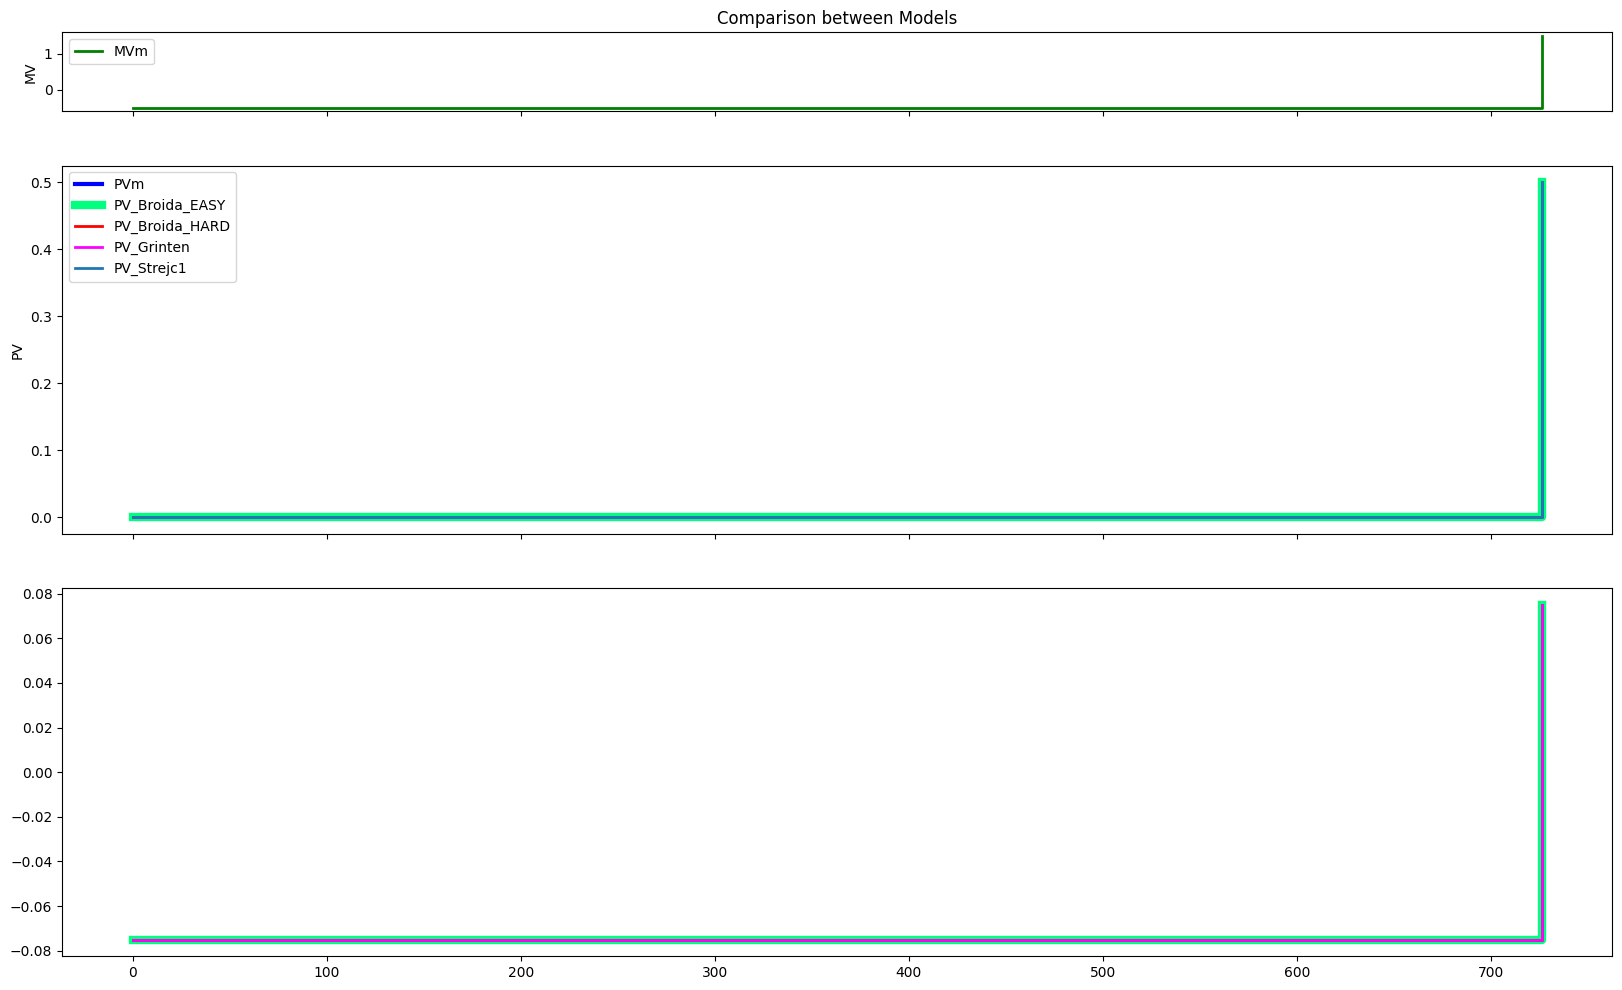

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)
ax1.set_title("Comparison between Models")

#--MV
limSup = 1.5
limInf = -0.5
l_MV, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')


#----PV
limSup = 0.5
limInf = 0
l_PV, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l_Broida_EASY, = ax2.step([0, TSim], [limInf,limSup], 'springgreen', linewidth=6, label='PV_Broida_EASY', where='post')
l_Broida_HARD, = ax2.step([0, TSim], [limInf,limSup], 'r-', linewidth=2, label='PV_Broida_HARD', where='post') 
l_VDG, = ax2.step([0, TSim], [limInf,limSup], 'magenta', linewidth=2, label='PV_Grinten', where='post') 
l_PV_strj_1, = ax2.step([0, TSim], [limInf,limSup], '', linewidth=2, label='PV_Strejc1', where='post')

ax2.set_ylabel('PV')
ax2.legend (loc='best')


#---Model_Diff
limInf = -0.075
limSup = 0.075
diff_BroidaEASY_PV = [a - b for a,b in zip(PVm, PV_Broida_EASY)]
l1, = ax3.step([0, TSim], [limInf,limSup], 'springgreen', linewidth=6, label='PV_Broida_EASY', where='post')

diff_Broida_HARD_PV = [a - b for a,b in zip(PVm, PV_Broida_HARD)]
l2, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=2, label='PV_Broida_HARD', where='post') 

diff_PV_Grinten_PV = [a - b for a,b in zip(PVm, PV_Grinten)]
l3, = ax3.step([0, TSim], [limInf,limSup], 'magenta', linewidth=2, label='PV_Grinten', where='post') 

diff_strejc1_PV = [a - b for a,b in zip(PVm, PV_Strejc_1)]
l4, = ax3.step([0, TSim], [limInf,limSup], '-', linewidth=2, label='PV_Strejc1', where='post') 

ax3.set_ylabel('DELTA')
ax3.legend (loc='best')




#-----Set Data-----
l_MV.set_data(tm, MVm)
l_PV.set_data(tm,PVm)
l_Broida_EASY.set_data(tm, PV_Broida_EASY)
l_Broida_HARD.set_data(tm,PV_Broida_HARD)
l_VDG.set_data(tm, PV_Grinten)
l_PV_strj_1.set_data(tm, PV_Strejc_1)

l1.set_data(tm, diff_BroidaEASY_PV)
l2.set_data(tm, diff_Broida_HARD_PV)
l3.set_data(tm, diff_PV_Grinten_PV)
l4.set_data(tm, diff_strejc1_PV)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)
ax1.grid()
ax2.grid()
ax3.grid()

